In [2]:
import pandas as pd
import numpy as np
import os
import glob
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt

In [3]:
train_files = glob.glob('./img_data/CROHME_training_2011/*inkml')
train_files[:5]

['./img_data/CROHME_training_2011/TrainData1_5_sub_21.inkml',
 './img_data/CROHME_training_2011/TrainData2_19_sub_98.inkml',
 './img_data/CROHME_training_2011/TrainData1_7_sub_12.inkml',
 './img_data/CROHME_training_2011/TrainData2_19_sub_20.inkml',
 './img_data/CROHME_training_2011/TrainData1_2_sub_21.inkml']

In [4]:
num = 12
print(train_files[num])
tree = ET.parse(train_files[num])

./img_data/CROHME_training_2011/TrainData2_16_sub_88.inkml


In [5]:
root = tree.getroot()
root

<Element '{http://www.w3.org/2003/InkML}ink' at 0x7fd5a1b5ae00>

In [6]:
root.attrib

{}

In [7]:
for child in root:
    namespace = child.tag
    print(child.tag, child.attrib)
    break

{http://www.w3.org/2003/InkML}traceFormat {}


In [8]:
doc_namespace = "{http://www.w3.org/2003/InkML}"


https://www.kaggle.com/code/kalikichandu/preprossing-inkml-to-png-files

In [9]:
#   'Stores traces_all with their corresponding id'
    traces_all = [{'id': trace_tag.get('id'),
    					'coords': [[round(float(axis_coord)) if float(axis_coord).is_integer() else round(float(axis_coord) * 10000) \
    									for axis_coord in coord[1:].split(' ')] if coord.startswith(' ') \
    								else [round(float(axis_coord)) if float(axis_coord).is_integer() else round(float(axis_coord) * 10000) \
    									for axis_coord in coord.split(' ')] \
    							for coord in (trace_tag.text).replace('\n', '').split(',')]} \
    							for trace_tag in root.findall(doc_namespace + 'trace')]


IndentationError: unexpected indent (2552788985.py, line 2)

In [10]:
for annot_tag in root.findall(doc_namespace + 'annotation'):
    print(annot_tag.text)

3 0 \times 2 9 x^{2 8}
tPx6rw/kMMSX5BE1nr5y6beP4sw=
Male
22
right-handed
2011_KAIST_Data2_16_sub_88
KAIST


In [11]:

traceGroupWrapper = root.find(doc_namespace + 'traceGroup')
if traceGroupWrapper is not None:
    for traceGroup in traceGroupWrapper.findall(doc_namespace + 'traceGroup'):

        label = traceGroup.find(doc_namespace + 'annotation').text
        print(label)
        
        #    'traces of the current traceGroup'
        traces_curr = []
        for traceView in traceGroup.findall(doc_namespace + 'traceView'):

        # 'Id reference to specific trace tag corresponding to currently considered label'
            traceDataRef = int(traceView.get('traceDataRef'))
            #print('ref:', traceDataRef)
            # 'Each trace is represented by a list of coordinates to connect'
            #single_trace = traces_all[traceDataRef]['coords']
            #traces_curr.append(single_trace)

            #traces_data.append({'label': label, 'trace_group': traces_curr})

3
0
\times
2
9
x
2
8


In [12]:
ids = []
coords = []
for trace_tag in root.findall(doc_namespace + 'trace'):
    ids.append(trace_tag.get('id'))
    coords.append(trace_tag.text.strip())

In [19]:
print(yy)

[[3413.0, 3413.0, 3413.0, 3413.0, 3395.0, 3388.0, 3378.0, 3368.0, 3358.0, 3350.0, 3347.0, 3349.0, 3365.0, 3389.0, 3420.0, 3461.0, 3570.0, 3636.0, 3706.0, 3785.0, 3855.0, 3918.0, 3974.0, 4021.0, 4055.0, 4078.0, 4092.0, 4102.0, 4119.0, 4132.0, 4150.0, 4201.0, 4238.0, 4283.0, 4339.0, 4399.0, 4465.0, 4534.0, 4679.0, 4757.0, 4904.0, 4968.0, 5024.0, 5070.0, 5112.0, 5134.0, 5143.0, 5140.0, 5127.0, 5111.0, 5091.0, 5056.0, 5041.0, 5036.0, 5036.0, 502.0], [3574.0, 3678.0, 3764.0, 3865.0, 4108.0, 4237.0, 4358.0, 4460.0, 4543.0, 4602.0, 4645.0, 4625.0, 4585.0, 4529.0, 4459.0, 4381.0, 4296.0, 4204.0, 4107.0, 3913.0, 3827.0, 3749.0, 3685.0, 3637.0, 3606.0, 3596.0, 3597.0, 3608.0, 3625.0, 363.0], [3410.0, 3422.0, 3450.0, 3496.0, 3559.0, 3767.0, 3909.0, 4073.0, 4248.0, 4426.0, 4777.0, 4939.0, 5084.0, 5200.0, 5294.0, 5355.0, 5379.0, 536.0], [3931.0, 3834.0, 3758.0, 3692.0, 3648.0, 3623.0, 3614.0, 3639.0, 3761.0, 3854.0, 3974.0, 4110.0, 4260.0, 4411.0, 4562.0, 4706.0, 4851.0, 4987.0, 5114.0, 5228.0, 532

In [15]:
xx = []
yy = []
for i in range(len(coords)):
    
    x = coords[i].split(' ')[::2]
    print(x)
    xx.append([float(coord) for coord in x])
    
    y = coords[i].split(' ')[1::2]
    yy.append([float(coord[:-1]) for coord in y])

['5230', '5214', '5214', '5214', '5224', '5253', '5293', '5342', '5401', '5463', '5526', '5590', '5696', '5732', '5757', '5770', '5759', '5738', '5705', '5664', '5615', '5561', '5504', '5455', '5406', '5367', '5337', '5319', '5331', '5360', '5403', '5514', '5581', '5650', '5714', '5773', '5821', '5858', '5890', '5886', '5834', '5798', '5751', '5697', '5637', '5568', '5495', '5427', '5353', '5282', '5219', '5114', '5086', '5070', '5070', '5081']
['6735', '6622', '6563', '6504', '6438', '6437', '6455', '6504', '6572', '6654', '6847', '6952', '7053', '7146', '7223', '7278', '7314', '7336', '7331', '7264', '7202', '7126', '7038', '6949', '6859', '6773', '6702', '6643', '6601', '6587']
['9839', '9775', '9725', '9661', '9586', '9425', '9336', '9238', '9136', '9032', '8819', '8720', '8620', '8532', '8450', '8372', '8301', '8236']
['7919', '7945', '7969', '8001', '8038', '8079', '8132', '8192', '8333', '8423', '8521', '8631', '8743', '8860', '8977', '9104', '9224', '9345', '9454', '9554', '964

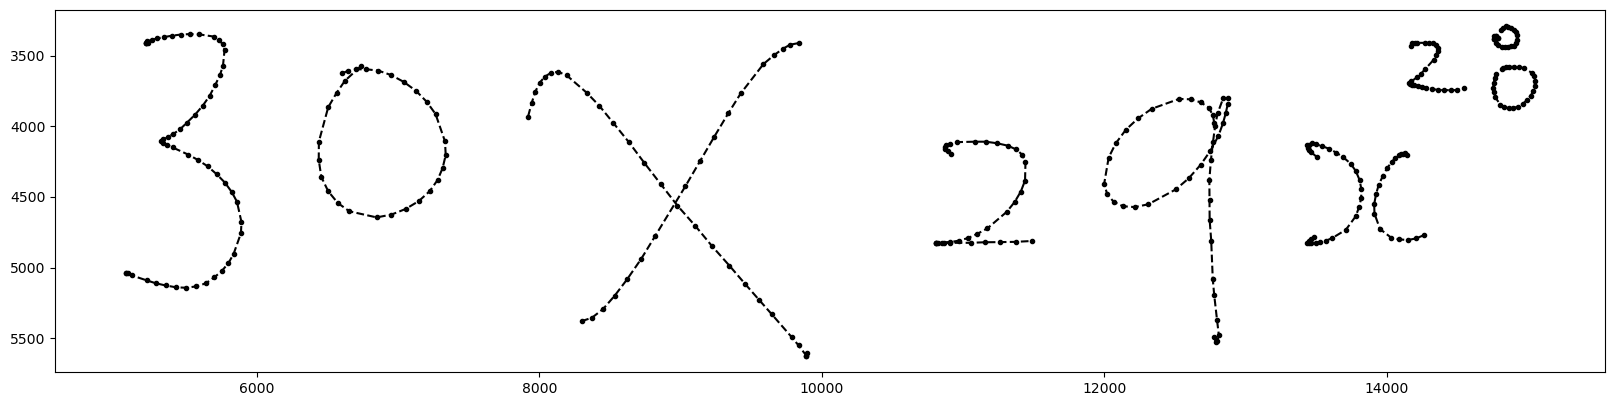

In [100]:
plt.figure(figsize=(20, 8))
for i in range(len(xx)):
    plt.plot(xx[i][:-1], yy[i][:-1], marker='o', markersize=3, linestyle='dashed', color='black');
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
ax.invert_yaxis()